## Loading the data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

#def load_housing_data():
#    tarball_path = Path("datasets/housing.tgz")
#    if not tarball_path.is_file():
#        Path("datasets").mkdir(parents=True, exist_ok=True)
#        url = "https://github.com/ageron/data/raw/main/housing.tgz"
#        urllib.request.urlretrieve(url, tarball_path)
#        with tarfile.open(tarball_path) as housing_tarball:
#            housing_tarball.extractall(path="datasets")
#    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
#housing = load_housing_data()

## Take a quick look

In [2]:
housing = pd.read_csv("C:\\Users\\mkcak\\OneDrive - Hochschule Luzern\\Documents\\Learning Projects\\Hands-on Machine Learning\\Regression\\datasets\\housing\\housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


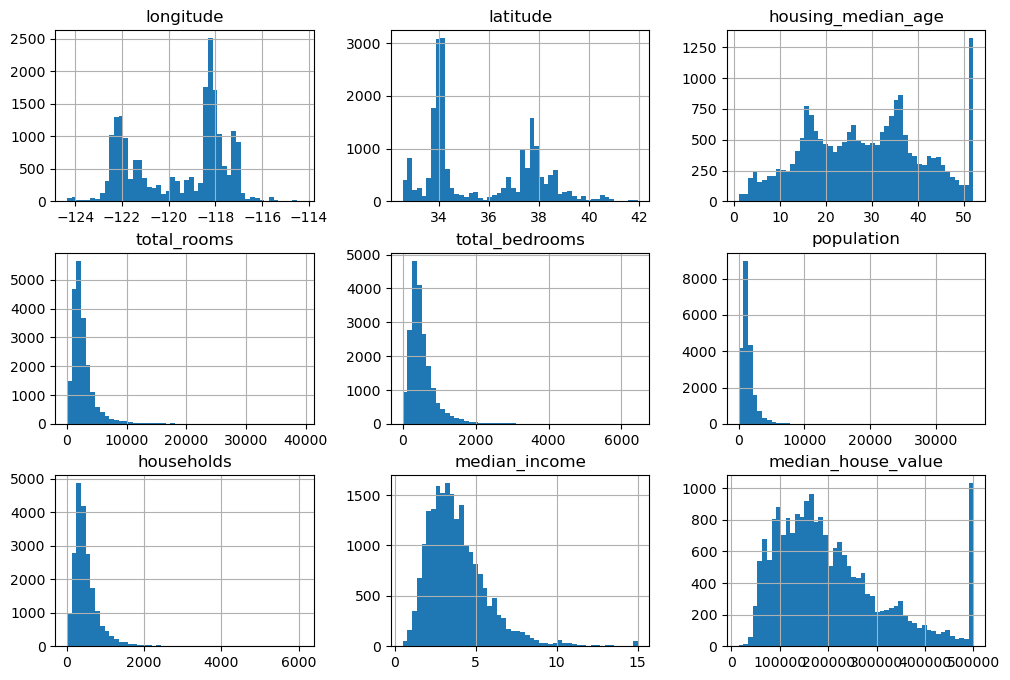

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()


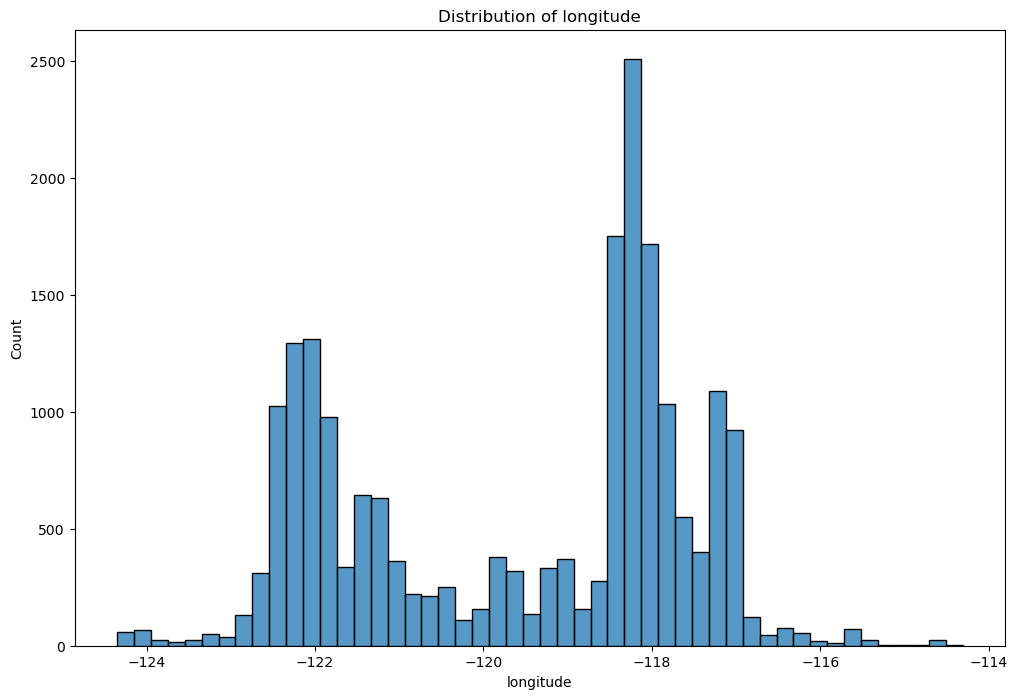

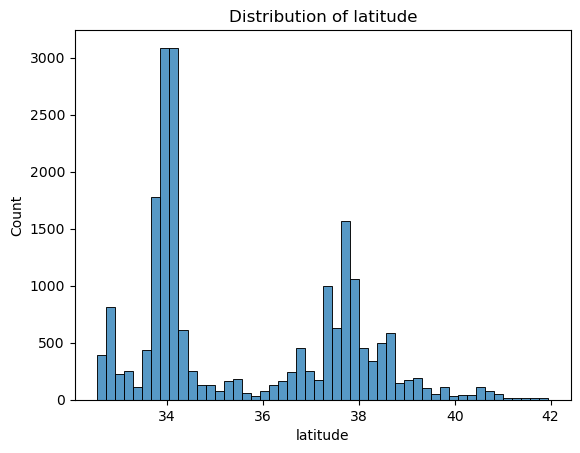

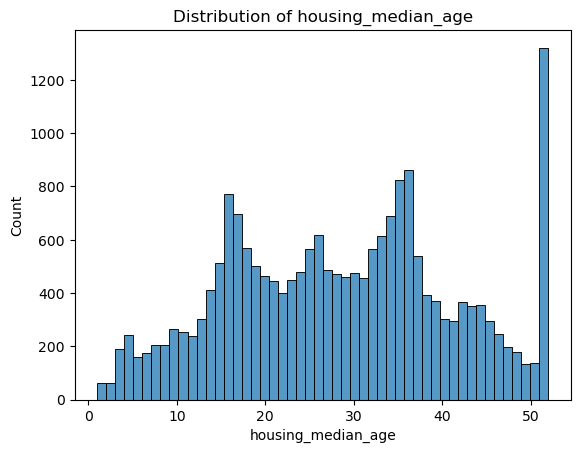

In [9]:
import seaborn as sns

plt.figure(figsize=(12,8))

for column in housing.select_dtypes(include=["float64", "int64"]).columns[0:3]:
    sns.histplot(housing[column], bins = 50, kde = False)
    plt.title(f"Distribution of {column}")
    plt.show()
               

## Split the dataset

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42 )

### Creating categorical variable

In [11]:
import numpy as np
housing["income_cat"]= pd.cut(housing["median_income"],bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

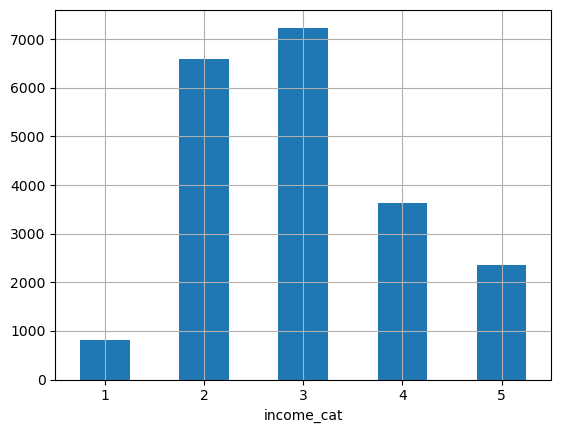

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

### Splitting and stratifying together

In [13]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

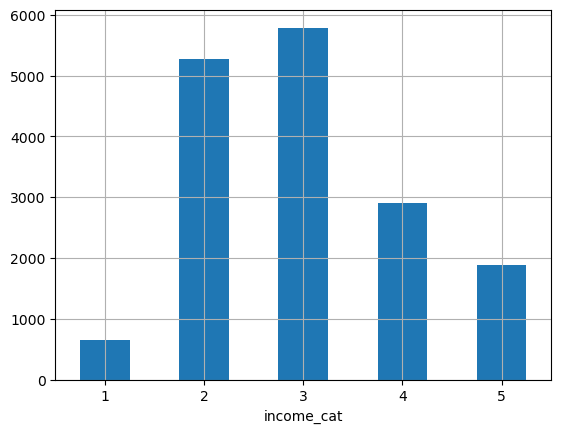

In [14]:
strat_train_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

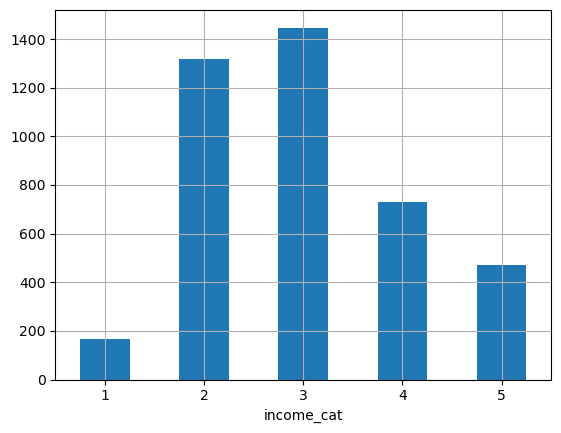

In [15]:
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

## Visualization of Geographical data

In [16]:
hosuing  = strat_train_set.copy()

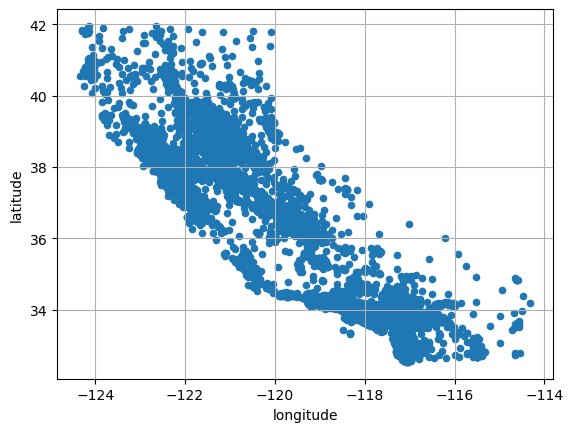

In [17]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True)
plt.show()

### Setting an alpha option to see high_density areas

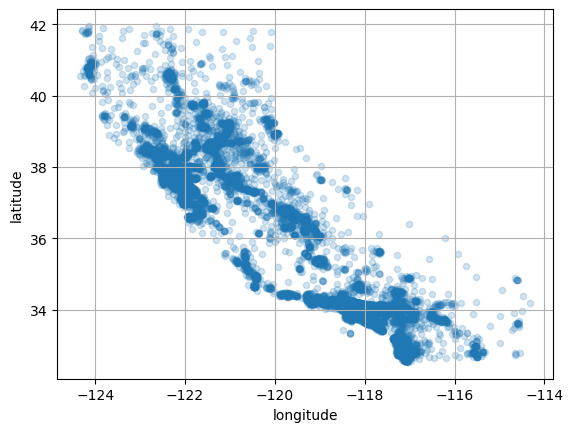

In [18]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True, alpha = 0.2)
plt.show()

### Color shows price, radius of circles shows distrcits of population

<Axes: xlabel='longitude', ylabel='latitude'>

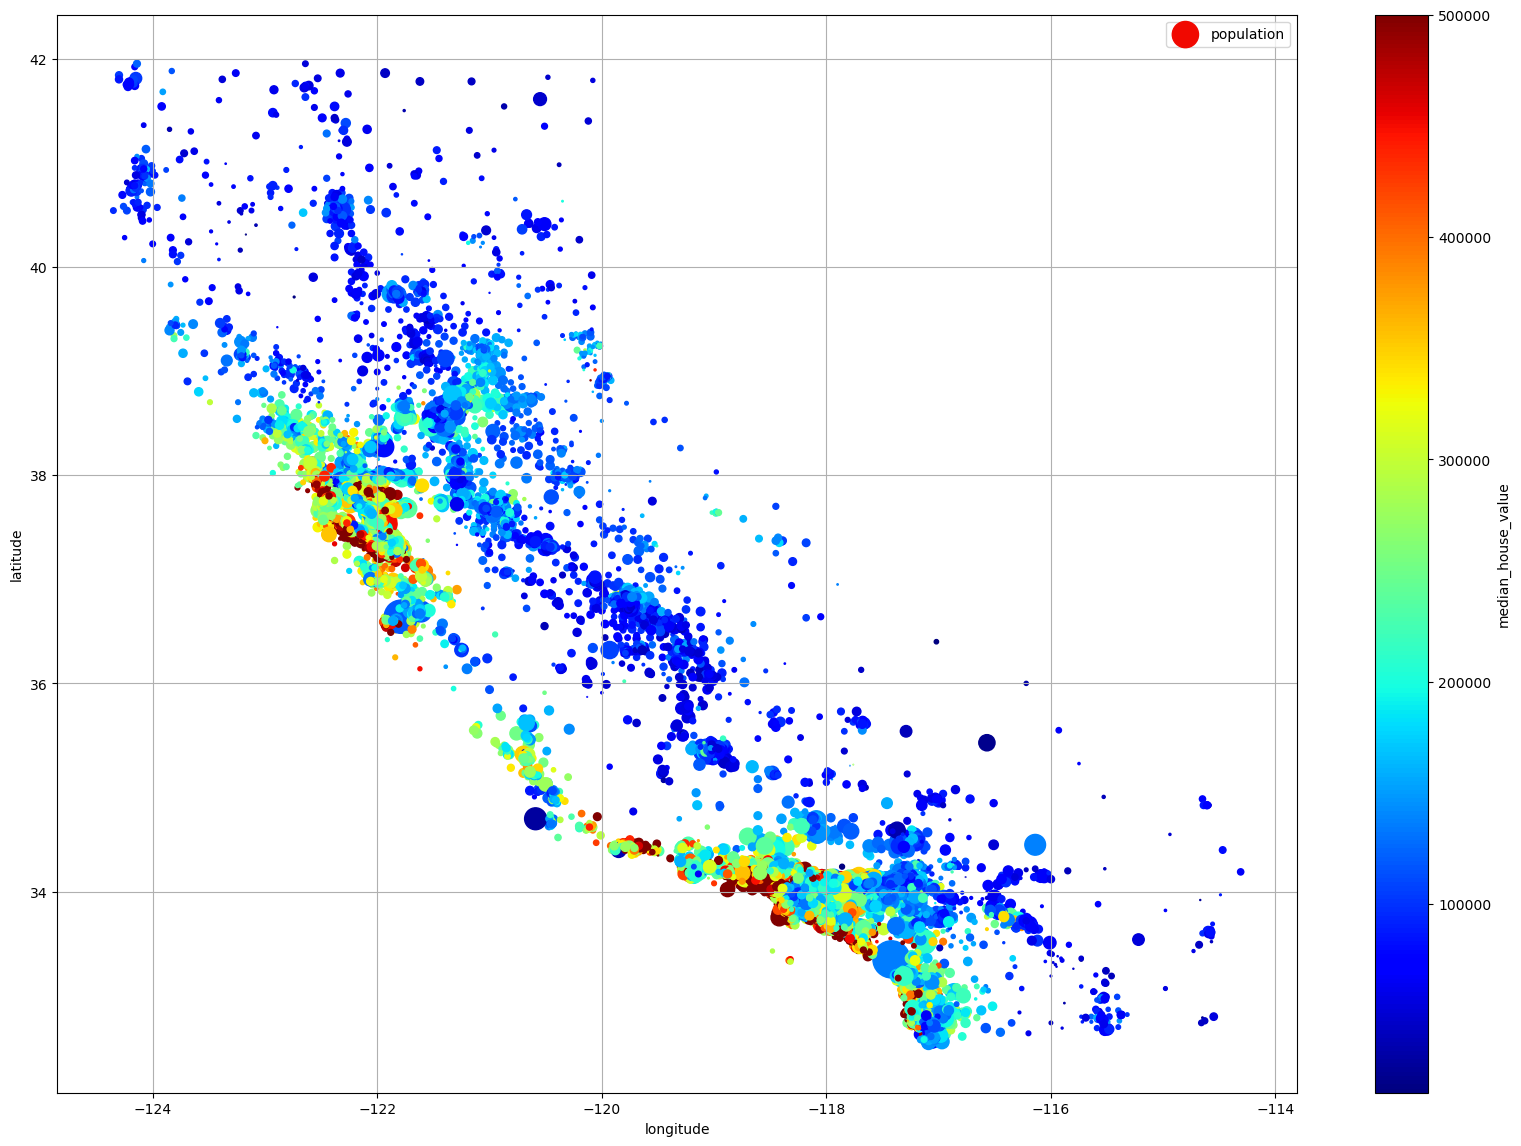

In [19]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True,
             s = housing["population"]/50, label = "population",
             c = "median_house_value", cmap = "jet", colorbar = True,
             legend=True, sharex = False, figsize=(20,14))

### Look for correlations

In [20]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

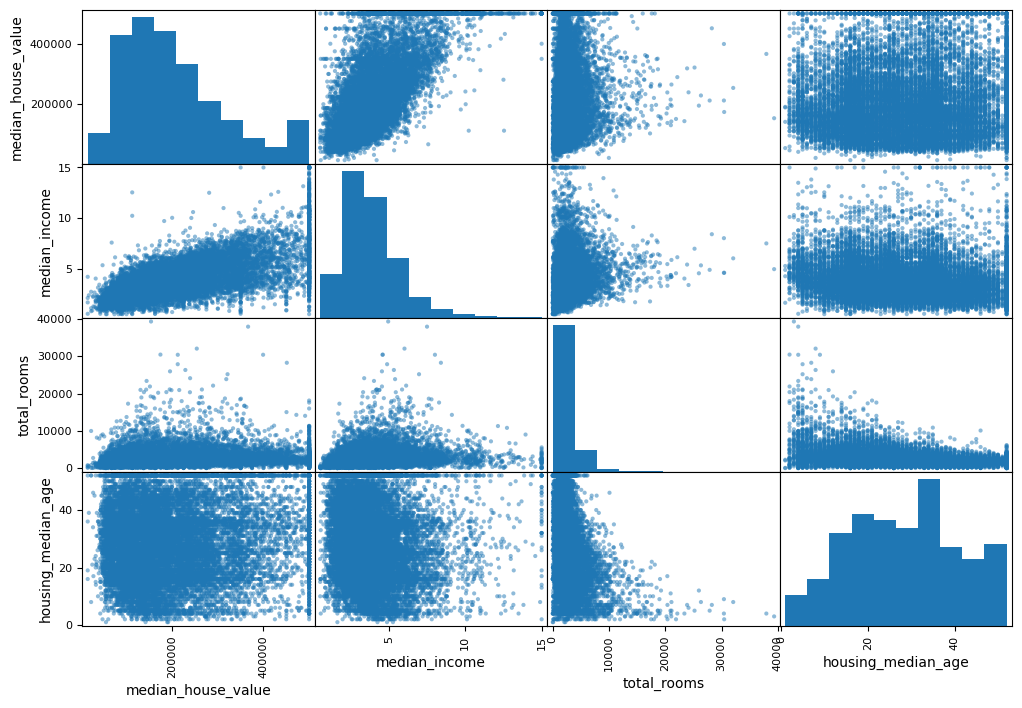

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(hosuing[attributes], figsize=(12,8))
plt.show()

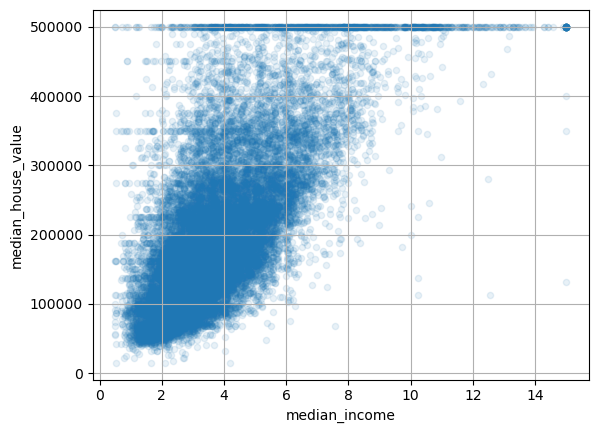

In [23]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, grid = True)
plt.show()

### Combination of attributes

In [24]:
housing["rooms_per_house"] = housing["total_rooms"]/ hosuing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] /housing["total_rooms"]
hosuing["people_per_house"] = hosuing["population"] / hosuing["households"]

In [25]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.143663
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

### Preparing data for machine learning

In [26]:
hosuing = train_set.drop("median_house_value", axis= 1)
housing_labels = strat_train_set["median_house_value"].copy()


### Dealing with missing variables

In [27]:
# median = housing["total_bedrooms"].median()
# hosuing.fillna(median, inplace=True)

### Imputer

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [29]:
housing_num = housing.select_dtypes(include = [np.number])

In [30]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.23557310e+00,  2.03162434e-01])

In [32]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.23557310e+00,  2.03162434e-01])

In [33]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


In [34]:
X = imputer.transform(housing_num)

In [35]:
X

array([[-1.22230000e+02,  3.78800000e+01,  4.10000000e+01, ...,
         4.52600000e+05,  6.98412698e+00,  1.46590909e-01],
       [-1.22220000e+02,  3.78600000e+01,  2.10000000e+01, ...,
         3.58500000e+05,  6.23813708e+00,  1.55796591e-01],
       [-1.22240000e+02,  3.78500000e+01,  5.20000000e+01, ...,
         3.52100000e+05,  8.28813559e+00,  1.29516019e-01],
       ...,
       [-1.21220000e+02,  3.94300000e+01,  1.70000000e+01, ...,
         9.23000000e+04,  5.20554273e+00,  2.15173026e-01],
       [-1.21320000e+02,  3.94300000e+01,  1.80000000e+01, ...,
         8.47000000e+04,  5.32951289e+00,  2.19892473e-01],
       [-1.21240000e+02,  3.93700000e+01,  1.60000000e+01, ...,
         8.94000000e+04,  5.23557310e+00,  2.21184919e-01]])

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = housing_num.index)

In [37]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


### Handling Text and Categorical Attributes

In [49]:
housing_cat = housing[["ocean_proximity"]]

In [41]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
ordinal_encoder = OrdinalEncoder()

In [50]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [51]:
housing_cat_encoded[:8]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]